In [1]:
#importing the dependencies

In [2]:
import tensorflow as tf
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

In [3]:
#removing the dodgy images

In [4]:
import cv2
import imghdr

In [5]:
data_dir='data'

In [6]:
img_exts=['jpeg','jpg','bmp','png']

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in img_exts:
                print('Image not in the list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [8]:
#Loading the data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 668 files belonging to 2 classes.


In [11]:
data_iterator=data.as_numpy_iterator()

In [12]:
batch=data_iterator.next()

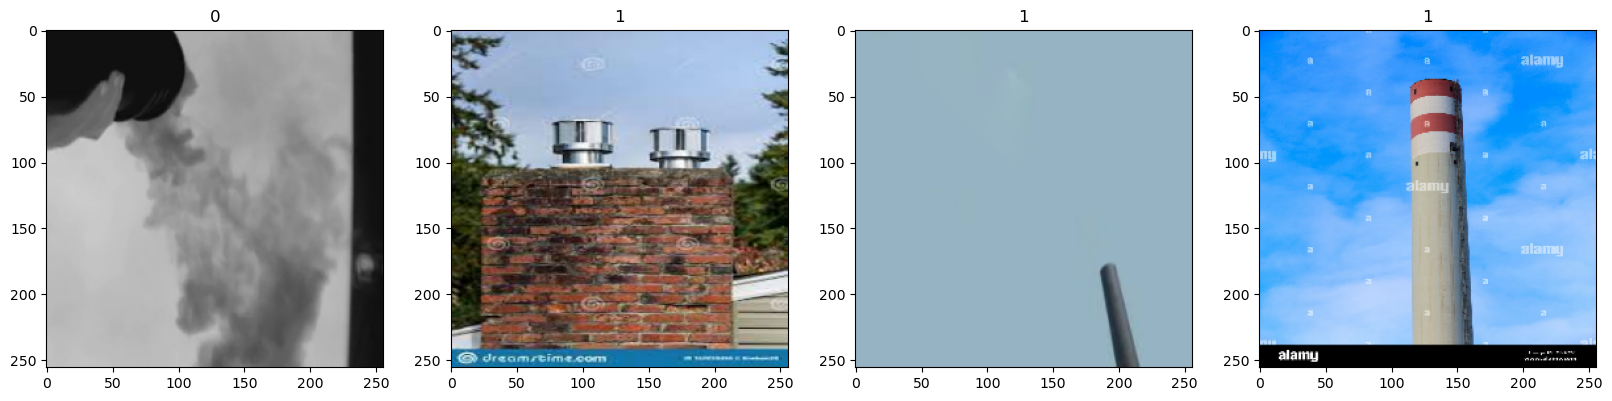

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
#scale the data

In [15]:
data=data.map(lambda x,y:(x/255,y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[0.6431373 , 0.6431373 , 0.6431373 ],
          [0.6392157 , 0.6392157 , 0.6392157 ],
          [0.6324755 , 0.6324755 , 0.6324755 ],
          ...,
          [0.32156864, 0.32156864, 0.32156864],
          [0.32156864, 0.32156864, 0.32156864],
          [0.32156864, 0.32156864, 0.32156864]],
 
         [[0.64705884, 0.64705884, 0.64705884],
          [0.6431373 , 0.6431373 , 0.6431373 ],
          [0.6336397 , 0.6336397 , 0.6336397 ],
          ...,
          [0.32156864, 0.32156864, 0.32156864],
          [0.32156864, 0.32156864, 0.32156864],
          [0.32156864, 0.32156864, 0.32156864]],
 
         [[0.64387256, 0.64387256, 0.64387256],
          [0.64234066, 0.64234066, 0.64234066],
          [0.6333333 , 0.6333333 , 0.6333333 ],
          ...,
          [0.32156864, 0.32156864, 0.32156864],
          [0.32156864, 0.32156864, 0.32156864],
          [0.32156864, 0.32156864, 0.32156864]],
 
         ...,
 
         [[0.5372549 , 0.5372549 , 0.5372549 ],
          [0.53725

In [17]:
#split the data

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
train_size

14

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [21]:
#building the model

In [22]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [28]:
#train

In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train, epochs=200, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/200
14/14 [==============================] - 5s 287ms/step - loss: 0.6186 - accuracy: 0.6629 - val_loss: 0.5721 - val_accuracy: 0.6797
Epoch 2/200
14/14 [==============================] - 4s 296ms/step - loss: 0.5503 - accuracy: 0.7522 - val_loss: 0.4806 - val_accuracy: 0.7969
Epoch 3/200
14/14 [==============================] - 4s 298ms/step - loss: 0.5449 - accuracy: 0.7656 - val_loss: 0.4589 - val_accuracy: 0.8047
Epoch 4/200
14/14 [==============================] - 4s 292ms/step - loss: 0.4880 - accuracy: 0.7723 - val_loss: 0.4948 - val_accuracy: 0.7422
Epoch 5/200
14/14 [==============================] - 4s 293ms/step - loss: 0.4647 - accuracy: 0.7879 - val_loss: 0.4276 - val_accuracy: 0.7812
Epoch 6/200
14/14 [==============================] - 4s 296ms/step - loss: 0.4588 - accuracy: 0.7679 - val_loss: 0.5025 - val_accuracy: 0.7656
Epoch 7/200
14/14 [==============================] - 4s 282ms/step - loss: 0.4419 - accuracy: 0.8036 - val_loss: 0.3891 - val_accuracy: 0.8281

Epoch 58/200
14/14 [==============================] - 4s 294ms/step - loss: 0.1647 - accuracy: 0.9174 - val_loss: 0.1674 - val_accuracy: 0.9375
Epoch 59/200
14/14 [==============================] - 4s 300ms/step - loss: 0.1780 - accuracy: 0.9241 - val_loss: 0.1704 - val_accuracy: 0.9219
Epoch 60/200
14/14 [==============================] - 4s 292ms/step - loss: 0.1718 - accuracy: 0.9107 - val_loss: 0.2055 - val_accuracy: 0.8984
Epoch 61/200
14/14 [==============================] - 4s 298ms/step - loss: 0.1880 - accuracy: 0.9040 - val_loss: 0.2104 - val_accuracy: 0.9219
Epoch 62/200
14/14 [==============================] - 4s 290ms/step - loss: 0.1552 - accuracy: 0.9353 - val_loss: 0.2065 - val_accuracy: 0.9219
Epoch 63/200
14/14 [==============================] - 4s 297ms/step - loss: 0.1802 - accuracy: 0.9308 - val_loss: 0.2294 - val_accuracy: 0.8984
Epoch 64/200
14/14 [==============================] - 4s 283ms/step - loss: 0.1901 - accuracy: 0.9241 - val_loss: 0.2821 - val_accuracy:

Epoch 115/200
14/14 [==============================] - 4s 295ms/step - loss: 0.0457 - accuracy: 0.9777 - val_loss: 0.0329 - val_accuracy: 0.9844
Epoch 116/200
14/14 [==============================] - 4s 290ms/step - loss: 0.0707 - accuracy: 0.9732 - val_loss: 0.0631 - val_accuracy: 0.9766
Epoch 117/200
14/14 [==============================] - 4s 293ms/step - loss: 0.0497 - accuracy: 0.9710 - val_loss: 0.0273 - val_accuracy: 1.0000
Epoch 118/200
14/14 [==============================] - 4s 296ms/step - loss: 0.0433 - accuracy: 0.9821 - val_loss: 0.0751 - val_accuracy: 0.9531
Epoch 119/200
14/14 [==============================] - 4s 299ms/step - loss: 0.0603 - accuracy: 0.9821 - val_loss: 0.1316 - val_accuracy: 0.9531
Epoch 120/200
14/14 [==============================] - 4s 289ms/step - loss: 0.0780 - accuracy: 0.9688 - val_loss: 0.0416 - val_accuracy: 0.9766
Epoch 121/200
14/14 [==============================] - 4s 293ms/step - loss: 0.0683 - accuracy: 0.9732 - val_loss: 0.0470 - val_ac

14/14 [==============================] - 4s 285ms/step - loss: 0.0107 - accuracy: 0.9978 - val_loss: 0.0175 - val_accuracy: 0.9844
Epoch 172/200
14/14 [==============================] - 4s 286ms/step - loss: 0.0126 - accuracy: 0.9933 - val_loss: 0.0189 - val_accuracy: 0.9922
Epoch 173/200
14/14 [==============================] - 4s 284ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0145 - val_accuracy: 0.9922
Epoch 174/200
14/14 [==============================] - 4s 299ms/step - loss: 0.0133 - accuracy: 0.9955 - val_loss: 0.0212 - val_accuracy: 0.9922
Epoch 175/200
14/14 [==============================] - 4s 292ms/step - loss: 0.0204 - accuracy: 0.9955 - val_loss: 0.0262 - val_accuracy: 0.9922
Epoch 176/200
14/14 [==============================] - 4s 289ms/step - loss: 0.0089 - accuracy: 0.9978 - val_loss: 0.0331 - val_accuracy: 0.9844
Epoch 177/200
14/14 [==============================] - 4s 287ms/step - loss: 0.0173 - accuracy: 0.9955 - val_loss: 0.0623 - val_accuracy: 0.9766

In [32]:
#plot performance

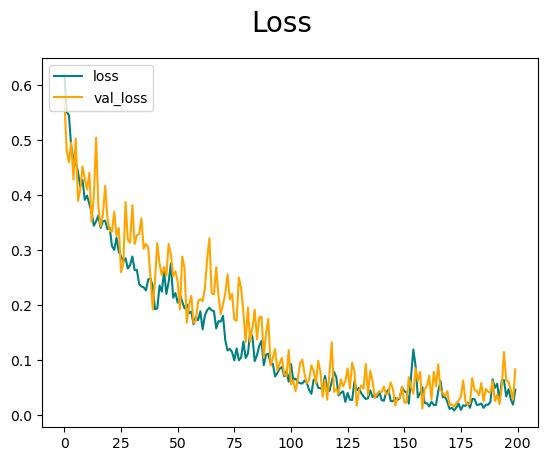

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

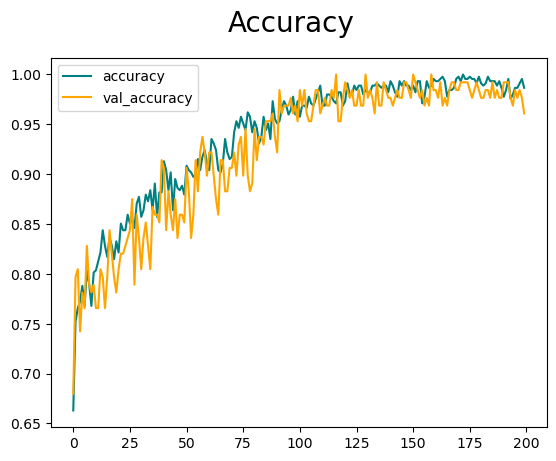

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [35]:
#evaluate

In [36]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 74ms/step


In [39]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.88235295, shape=(), dtype=float32) tf.Tensor(0.88235295, shape=(), dtype=float32) tf.Tensor(0.9375, shape=(), dtype=float32)


In [40]:
#test

In [41]:
import cv2

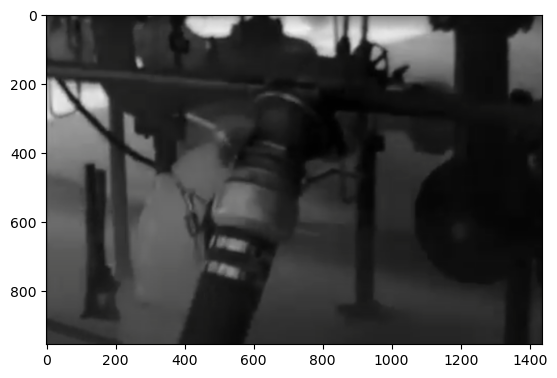

In [46]:
img = cv2.imread('imagesfortest/39.png')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

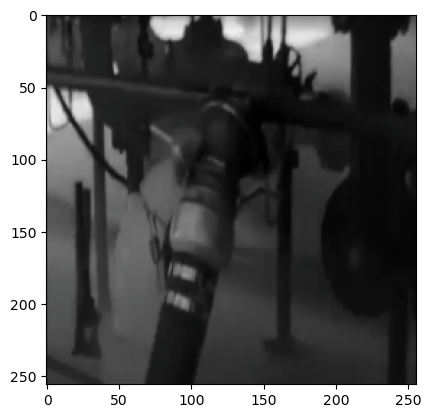

In [47]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [48]:
yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)

1/1 [==============================] - 0s 26ms/step
[[0.00476136]]


In [49]:
if yhat > 0.5: 
    print(f'There is no smoke leak.')
else:
    print(f'There is smoke leak.')

There is smoke leak.
